In [1]:
import time
import os

import numpy as np
from diffrax import diffeqsolve, ODETerm, SaveAt, Kvaerno5, Kvaerno4, PIDController
import jax.numpy as jnp
import jax


import matplotlib.pyplot as plt

from rosenbrock import Rosenbrock23
from rodas5 import Rodas5


mu = 100
t0, t1 = 0., 3*mu
y0 = jnp.array([2., 0.])

rtol = 1e-5
atol = 1e-5

def f(t, y, args):
    return jnp.array([y[1], mu*(1-y[0]**2)*y[1]-y[0]])



N = 100

stepsize_controller = PIDController(rtol=rtol, atol=atol)
term = ODETerm(f)
kvaerno5 = Kvaerno5()
kvaerno4 = Kvaerno4()
rosenbrock23 = Rosenbrock23()
rodas5 = Rodas5()
T_end = t1
stepsize = T_end/N
saveat = SaveAt(ts=list(np.arange(0, T_end, stepsize)))


In [2]:
jax.jacfwd(lambda y: term.vf(t=0, y=y, args=None))(y0)

Array([[   0.,    1.],
       [  -1., -300.]], dtype=float32)

In [3]:
control = term.contr(t0, t1)
type(control)

float

In [4]:
# start = time.time()
# sol_kvaerno4 = diffeqsolve(term, kvaerno4, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=100000)
# end = time.time()
# print("Kvaerno4 time: ", end-start)

start = time.time()
sol_kvaerno5 = diffeqsolve(term, kvaerno5, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=100000)
end = time.time()
print("Kvaerno5 time: ", end-start)

# start = time.time()
# sol_rosenbrock23 = diffeqsolve(term, rosenbrock23, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=1000000)
# end = time.time()
# print("Rosenbrock23 time: ", end-start)

start = time.time()
sol_rodas5 = diffeqsolve(term, rodas5, t0=0, t1=T_end, dt0=stepsize, y0=y0, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=10000000)
end = time.time()
print("Rodas5 time: ", end-start)



Kvaerno5 time:  1.0074892044067383
Rodas5 time:  0.4540266990661621


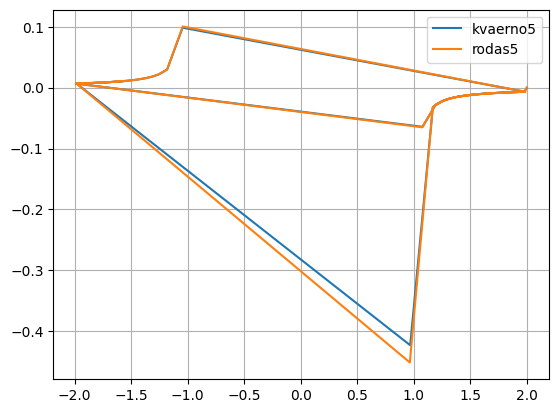

In [5]:
#plt.plot(sol_kvaerno4.ys[:,0], sol_kvaerno4.ys[:,1])
plt.plot(sol_kvaerno5.ys[:,0], sol_kvaerno5.ys[:,1], label="kvaerno5")
#plt.plot(sol_rosenbrock23.ys[:,0], sol_rosenbrock23.ys[:,1], label="rosenbrock23")
plt.plot(sol_rodas5.ys[:,0], sol_rodas5.ys[:,1], label="rodas5")

plt.grid()
plt.legend()

In [6]:
# for i,y0_0 in enumerate(np.linspace(-0,2,10)):
#     for j, y0_1 in enumerate(np.linspace(0,2, 10)):
#         y0_i = jnp.array([y0_0, y0_1])
#         print(i,j, y0_i)
#         sol = diffeqsolve(term, rodas5, t0=0, t1=T_end, dt0=stepsize, y0=y0_i, saveat=saveat, stepsize_controller=stepsize_controller, max_steps=10000000)
#         plt.plot(sol.ys[:,0], sol.ys[:,1], 'k')
        
#     print(i)

# plt.grid()



0 0 [0. 0.]
0 1 [0.         0.22222222]
0 2 [0.         0.44444445]
0 3 [0.        0.6666667]
0 4 [0.        0.8888889]
0 5 [0.        1.1111112]
0 6 [0.        1.3333334]
0 7 [0.        1.5555556]
0 8 [0.        1.7777778]
0 9 [0. 2.]
0
1 0 [0.22222222 0.        ]
1 1 [0.22222222 0.22222222]
1 2 [0.22222222 0.44444445]
1 3 [0.22222222 0.6666667 ]
1 4 [0.22222222 0.8888889 ]
1 5 [0.22222222 1.1111112 ]
1 6 [0.22222222 1.3333334 ]
1 7 [0.22222222 1.5555556 ]
1 8 [0.22222222 1.7777778 ]
1 9 [0.22222222 2.        ]
1
2 0 [0.44444445 0.        ]
2 1 [0.44444445 0.22222222]
2 2 [0.44444445 0.44444445]
2 3 [0.44444445 0.6666667 ]
2 4 [0.44444445 0.8888889 ]
2 5 [0.44444445 1.1111112 ]
2 6 [0.44444445 1.3333334 ]
2 7 [0.44444445 1.5555556 ]
2 8 [0.44444445 1.7777778 ]
2 9 [0.44444445 2.        ]
